<a href="https://colab.research.google.com/github/voshna123/tensorflow_practice/blob/main/Practice7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

In [1]:
import tf_keras

In [2]:
!pip install tensorflow_text
import tensorflow_text as text  # Registers the ops.


In [3]:
import tensorflow as tf
import pandas as pd

In [4]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25 (from 1)
Receiving objects: 100% (39/39), 177.08 MiB | 27.19 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [5]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-01-19 02:18:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-01-19 02:18:20 (119 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [6]:
from helper_functions import calculate_results,create_tensorboard_callback

In [7]:
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign"

In [8]:
import os

filenames = [data_dir + "/"+filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

#Preprocess Data

In [9]:
def get_lines(filename):
  """
  Reads filename and return the lines of text as a list

  Args:
  filename

  Returns:
  List of lines
  """

  with open(filename, "r") as f:
    return f.read().splitlines()

In [10]:
train_lines = get_lines(filenames[1])
train_lines[0:10]

['###24845963',
 'BACKGROUND\tThis study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( ADHF ) .',
 'RESULTS\tA post hoc analysis was conducted with the use of data from the Evaluation Study of Congestive Heart Failure and Pulmonary Artery Catheterization Effectiveness ( ESCAPE ) .',
 'RESULTS\tLiver function tests ( LFTs ) were measured at @ time points from baseline , at discharge , and up to @ months follow-up .',
 'RESULTS\tSurvival analyses were used to assess the association between admission Model of End-Stage Liver Disease Excluding International Normalized Ratio ( MELD-XI ) scores and patient outcome.There was a high prevalence of abnormal baseline ( admission ) LFTs ( albumin @ % , aspartate transaminase @ % , alanine transaminase @ % , and total bilirubin @ % ) .',
 "RESULTS\tThe percentage of patients with abnormal LFTs decreased significantly from baseline to @-months ' follow-up .",
 'RESULTS\tWhen 

In [63]:
val_lines = get_lines(filenames[2])

'RESULTS\tNo association was found between socioeconomic status and changes in CVD risk factors , suggesting that treatment was equitable .'

In [76]:
val_lines[2003]

''

In [25]:
train_lines[2012]

'CONCLUSIONS\tOne of these is explored in this article .'

In [77]:
from inspect import currentframe
def preprocesses_line(filename, types):
  """
  Returns list of dictionaries
  """

  input_line = get_lines(filename)
  text = []
  category =[]
  line_nums = []
  max_lines =[]


  curr_max= 0
  num = 0
  for line in input_line:


    if not '###' in line:
      if line == "":
        for x in range(curr_max):
          max_lines.append(curr_max)
        continue
      else:
        curr_max += 1
        line_nums.append(line_number)
        line_number += 1
        split = line.split("\t")
        category.append(split[0])
        text.append(split[1])
        num += 1

    else:

      line_number =0
      curr_max = 0
      if types == 'test':
          if num == 2005:
            return {"line_number": line_nums, "text": text, "category": category, "max" :max_lines}
      if types =='train':
          if num == 2014:
            return {"line_number": line_nums, "text": text, "category": category, "max" :max_lines}
      if types == 'val':
          if num == 2005:
            return {"line_number": line_nums, "text": text, "category": category, "max" :max_lines}




In [55]:
len(preprocesses_line(filenames[0],'test')['line_number']),len(preprocesses_line(filenames[0],'test')['text']),len(preprocesses_line(filenames[0],'test')['category']),len(preprocesses_line(filenames[0],'test')['max'])

(2005, 2005, 2005, 2005)

In [79]:
import pandas as pd
test_df = pd.DataFrame(preprocesses_line(filenames[0], 'test'))
txt_dict_train = preprocesses_line(filenames[1], 'train')
val_df = pd.DataFrame(preprocesses_line(filenames[2], 'val'))
train_df = pd.DataFrame(txt_dict_train)

<Axes: ylabel='Frequency'>

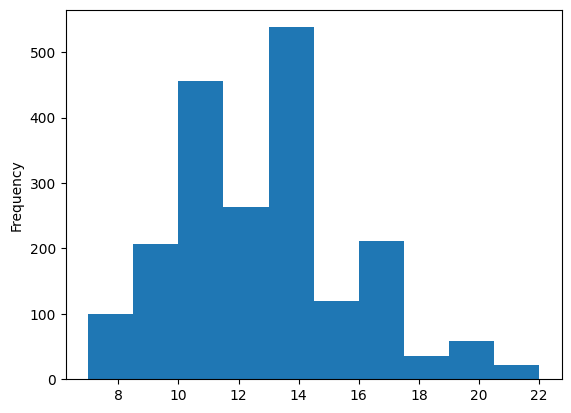

In [80]:
train_df['max'].plot.hist()

## Getting list of sentences

In [81]:
train_sentences = train_df['text'].to_list()
val_sentences = val_df['text'].to_list()
test_sentences = test_df['text'].to_list()

## Encode Labels

In [82]:
import sklearn

encoder = sklearn.preprocessing.OneHotEncoder()

train_onelabels = encoder.fit_transform(train_df['category'].to_numpy().reshape(-1,1))
train_onelabels = train_onelabels.toarray()
test_onelabels = encoder.fit_transform(test_df['category'].to_numpy().reshape(-1,1))
test_onelabels = test_onelabels.toarray()
val_onelabels = encoder.fit_transform(val_df['category'].to_numpy().reshape(-1,1))
val_onelabels = val_onelabels.toarray()

In [83]:
label_encoder = sklearn.preprocessing.LabelEncoder()
train_labels = label_encoder.fit_transform(train_df['category'])
test_labels = label_encoder.fit_transform(test_df['category'])
val_labels = label_encoder.fit_transform(val_df['category'])
train_labels, len(train_labels)


(array([0, 4, 4, ..., 1, 1, 0]), 2014)

In [84]:
class_names = label_encoder.classes_
class_names

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

## Getting character level tokens

In [85]:
def split_chars(text):
  return " ".join(list(text))

In [86]:
train_chars = [split_chars(text) for text in train_sentences]
test_chars = [split_chars(text) for text in test_sentences]
val_chars = [split_chars(text) for text in val_sentences]
train_chars[:5]

['T h i s   s t u d y   a n a l y z e d   l i v e r   f u n c t i o n   a b n o r m a l i t i e s   i n   h e a r t   f a i l u r e   p a t i e n t s   a d m i t t e d   w i t h   s e v e r e   a c u t e   d e c o m p e n s a t e d   h e a r t   f a i l u r e   (   A D H F   )   .',
 'A   p o s t   h o c   a n a l y s i s   w a s   c o n d u c t e d   w i t h   t h e   u s e   o f   d a t a   f r o m   t h e   E v a l u a t i o n   S t u d y   o f   C o n g e s t i v e   H e a r t   F a i l u r e   a n d   P u l m o n a r y   A r t e r y   C a t h e t e r i z a t i o n   E f f e c t i v e n e s s   (   E S C A P E   )   .',
 'L i v e r   f u n c t i o n   t e s t s   (   L F T s   )   w e r e   m e a s u r e d   a t   @   t i m e   p o i n t s   f r o m   b a s e l i n e   ,   a t   d i s c h a r g e   ,   a n d   u p   t o   @   m o n t h s   f o l l o w - u p   .',
 'S u r v i v a l   a n a l y s e s   w e r e   u s e d   t o   a s s e s s   t h e   a s s o c i a t i o n   b e t w e 

## create positional embeddings

In [87]:
train_line_numbers_one_hot = tf.one_hot(train_df['line_number'].to_numpy(), depth = 15)
val_line_numbers_one_hot = tf.one_hot(val_df['line_number'].to_numpy(), depth = 15)
test_line_numbers_one_hot = tf.one_hot(test_df['line_number'].to_numpy(), depth = 15)
train_line_numbers_one_hot.shape, train_line_numbers_one_hot[:10]

(TensorShape([2014, 15]),
 <tf.Tensor: shape=(10, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32)>)

In [88]:
import numpy as np

np.percentile(train_df['max'], 98)

20.0

In [89]:
train_max_one_hot = tf.one_hot(train_df['max'].to_numpy(), depth = 20)
val_max_one_hot = tf.one_hot(val_df['max'].to_numpy(), depth = 20)
test_max_one_hot = tf.one_hot(test_df['max'].to_numpy(), depth = 20)

In [90]:
train_max_one_hot

<tf.Tensor: shape=(2014, 20), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

# Creating char model, line number and max_line model

In [91]:
txt_vectoriser = tf_keras.layers.TextVectorization(max_tokens = 6800,
                                                   output_sequence_length = 55)

txt_vectoriser.adapt(train_sentences)

In [92]:
embedding_layer = tf_keras.layers.Embedding(input_dim = txt_vectoriser.vocabulary_size(),
                                            output_dim = 128,
                                            embeddings_initializer = "uniform",
                                            mask_zero = True)

In [93]:
char_vectoriser = tf_keras.layers.TextVectorization(max_tokens = 60,
                                                    output_sequence_length = 290,
                                                    standardize =None)

char_vectoriser.adapt(train_chars)

In [94]:
embedding_layer_char = tf_keras.layers.Embedding(input_dim = 60,
                                                 output_dim = 25,
                                                 mask_zero = True)

# Creating datasets

# Using BERT

In [179]:
import tensorflow_hub as hub
Inputs= tf_keras.layers.Input(shape = (), dtype = tf.string)
preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/2", trainable = False)
x  = preprocess(Inputs)
x = bert(x)

In [180]:
x

{'pooled_output': <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'keras_layer_11')>,
 'sequence_output': <KerasTensor: shape=(None, 128, 128) dtype=float32 (created by layer 'keras_layer_11')>,
 'encoder_outputs': [<KerasTensor: shape=(None, 128, 128) dtype=float32 (created by layer 'keras_layer_11')>,
  <KerasTensor: shape=(None, 128, 128) dtype=float32 (created by layer 'keras_layer_11')>,
  <KerasTensor: shape=(None, 128, 128) dtype=float32 (created by layer 'keras_layer_11')>,
  <KerasTensor: shape=(None, 128, 128) dtype=float32 (created by layer 'keras_layer_11')>,
  <KerasTensor: shape=(None, 128, 128) dtype=float32 (created by layer 'keras_layer_11')>,
  <KerasTensor: shape=(None, 128, 128) dtype=float32 (created by layer 'keras_layer_11')>,
  <KerasTensor: shape=(None, 128, 128) dtype=float32 (created by layer 'keras_layer_11')>,
  <KerasTensor: shape=(None, 128, 128) dtype=float32 (created by layer 'keras_layer_11')>,
  <KerasTensor: shape=(None, 128, 128) dty

In [181]:
model = tf_keras.Model(Inputs,x)

In [182]:
model.output['default'], char_model.output

(<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'keras_layer_11')>,
 <KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'bidirectional_3')>)

In [188]:
train_token_char_dataset = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, train_max_one_hot, train_chars, train_sentences))
train_token_char_labels = tf.data.Dataset.from_tensor_slices(train_onelabels)
train_token_char_dataset = tf.data.Dataset.zip((train_token_char_dataset, train_token_char_labels))

train_token_char_dataset = train_token_char_dataset.batch(16).prefetch(tf.data.AUTOTUNE)

In [189]:
test_token_char_dataset = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,test_max_one_hot,test_sentences, test_chars))
test_token_char_labels = tf.data.Dataset.from_tensor_slices(test_onelabels)
test_token_char_dataset = tf.data.Dataset.zip((test_token_char_dataset, test_token_char_labels))

test_token_char_dataset = test_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [190]:
val_token_char_dataset = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot, val_max_one_hot, val_sentences, val_chars))
val_token_char_labels = tf.data.Dataset.from_tensor_slices(val_onelabels)
val_token_char_dataset = tf.data.Dataset.zip((val_token_char_dataset, val_token_char_labels))

val_token_char_dataset = val_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [193]:
print(tf.__version__)
print(hub.__version__)

2.18.0
0.16.1


In [216]:
def create_combined_model():
    # Input layers
    line_input = tf_keras.layers.Input(shape=(15,), dtype=tf.float32, name="line_number_inputs")
    max_input = tf_keras.layers.Input(shape=(20,), dtype=tf.float32, name="max_lines")
    char_input = tf_keras.layers.Input(shape=(1,), dtype=tf.string, name="char_input")
    text_input = tf_keras.layers.Input(shape=(), dtype=tf.string, name="text_input")

    # Process BERT
    bert_preprocessed = preprocess(text_input)
    bert_outputs = bert(bert_preprocessed)['default']

    # Process char input
    char_vec = char_vectoriser(char_input)
    char_embed = embedding_layer_char(char_vec)
    char_conv = tf_keras.layers.Conv1D(32, 3, activation='relu')(char_embed)
    char_pool = tf_keras.layers.GlobalAveragePooling1D()(char_conv)


    # Process line and max inputs
    line_dense = tf_keras.layers.Dense(32, activation='relu')(line_input)
    max_dense = tf_keras.layers.Dense(32, activation='relu')(max_input)

    # Concatenate BERT and char outputs
    token_char = tf_keras.layers.Concatenate(name="token_char_hybrid")(
        [bert_outputs, char_pool]
    )

    # Dense layer after first concatenation
    combined_dense = tf_keras.layers.Dense(256, activation='relu')(token_char)
    combined_dropout = tf_keras.layers.Dropout(0.5)(combined_dense)

    # Final concatenation
    final_concat = tf_keras.layers.Concatenate(name="everything_combined")(
        [combined_dropout, line_dense, max_dense]
    )

    # Output layer
    outputs = tf_keras.layers.Dense(5, activation='softmax')(final_concat)

    # Create model
    model = tf_keras.Model(
        inputs=[line_input, max_input, char_input, text_input],
        outputs=outputs
    )

    return model

In [217]:
# Create and compile the model
combined_model = create_combined_model()
combined_model.compile(
    loss=tf_keras.losses.CategoricalCrossentropy(),
    optimizer=tf_keras.optimizers.Adam(clipnorm=1.0),
    metrics=['accuracy']
)

In [218]:
try:
    combined_model.fit(
        train_token_char_dataset,
        epochs=1,
        verbose=1
    )
except Exception as e:
    print("Error occurred:", e)

Error occurred: Graph execution error:

Detected at node model_27/conv1d_1/Conv1D defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloo